<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/Fuzzy(tt2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=db7a15e4f0478e427f14a1ff117dcafec79b9bc2bd263bf1ebe20db2db2a8c34
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


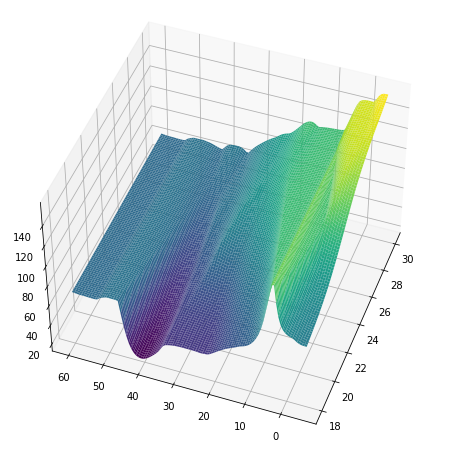

In [ ]:
#Điều khiển nhiệt độ 

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe1 = np.linspace(18,30,101)
universe2 = np.linspace(-5,60,101)
universe3 = np.linspace(0,255,101)


setpoint = ctrl.Antecedent(universe1,'setpoint')
sensor = ctrl.Antecedent(universe2,'sensor')
pwm = ctrl.Consequent(universe3,'pwm')
 
setpoint['L'] = fuzz.gaussmf(universe1,18,3)
setpoint['M']= fuzz.gaussmf(universe1,24,5)
setpoint['H'] = fuzz.gaussmf(universe1,30,4)

sensor['Cold'] = fuzz.gaussmf(universe2,-5,3)
sensor['Cool'] = fuzz.gaussmf(universe2,20,5)
sensor['Warm'] = fuzz.gaussmf(universe2,28,5)
sensor['Hot'] = fuzz.gaussmf(universe2,38,3)

pwm['HL'] = fuzz.gaussmf(universe3, 5,3)
pwm['LL']= fuzz.gaussmf(universe3, 50,4)
pwm['M'] = fuzz.gaussmf(universe3, 100,5)
pwm['LH'] = fuzz.gaussmf(universe3, 180,4)
pwm['HH']= fuzz.gaussmf(universe3, 230,3)





rule1 = ctrl.Rule(antecedent = ((setpoint['L']&sensor['Cold'])
|(setpoint['L']&sensor['Cool'])|(setpoint['L']&sensor['Warm'])
|(setpoint['M']&sensor['Cool'])), consequent = pwm['LL'], label = 'LL')
rule2 = ctrl.Rule(antecedent = ((setpoint['L']&sensor['Hot'])
|(setpoint['M']&sensor['Warm'])|(setpoint['M']&sensor['Hot'])), 
consequent = pwm['HL'], label = 'HL')
rule3 = ctrl.Rule(antecedent = ((setpoint['M']&sensor['Cold'])
|(setpoint['H']&sensor['Hot'])|(setpoint['H']&sensor['Warm'])),
 consequent = pwm['M'], label ='M')
rule4 = ctrl.Rule(antecedent = setpoint['H']&sensor['Cool'],
                  consequent = pwm['LH'], label ='LH')
rule5 = ctrl.Rule(antecedent = setpoint['H']&sensor['Cold'],
                  consequent = pwm['HH'], label ='HH')


system = ctrl.ControlSystem([rule1,rule2,rule3,rule4, rule5])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)
upsampled = np.linspace(18,30,101)
upsampled1 = np.linspace(-5,60,101)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(101):
  for j in range(101):
    sim.input['setpoint'] = x[i,j]
    sim.input['sensor'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['pwm']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)

ax.view_init(45,200)



Giá trị RC:
-62.3581632092737
Giá trị LC:
26.368787795339536
Giá trị PWM Motor1:
700.0048101833664
Giá trị PWM Motor2:
300.01101736839723


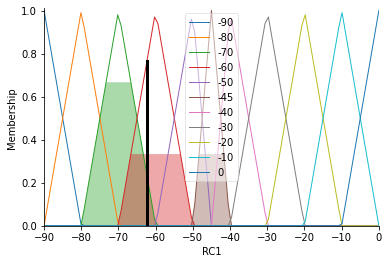

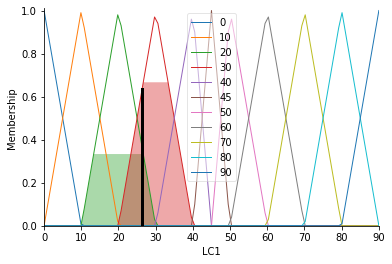

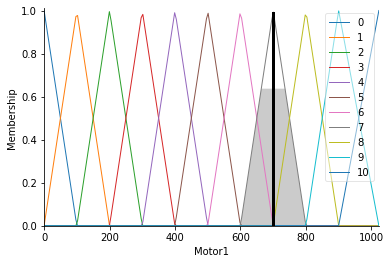

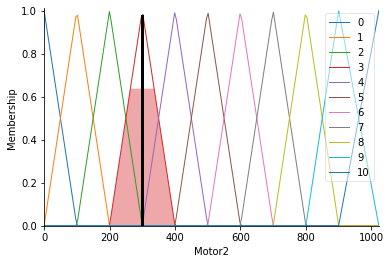

In [13]:
#Diều khiển mobile robot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe1 = np.linspace(0,3,101)
universe2 = np.linspace(-90,0,101)
universe3 = np.linspace(0,90,101)
universe4 = np.linspace(0,1023,201)

left = ctrl.Antecedent(universe1, 'Left')
right = ctrl.Antecedent(universe1, 'Right')
center = ctrl.Antecedent(universe1, 'Center')
RC1 = ctrl.Consequent(universe2,'RC1')
LC1 = ctrl.Consequent(universe3,'LC1')



names = ['VN', 'N', 'M', 'F', 'VF']


left.automf(names = names)
right.automf(names = names)
center.automf(names = names)

LC1['0'] = fuzz.trimf(universe3, [0,0,10])
LC1['10'] = fuzz.trimf(universe3, [0,10,20])
LC1['20'] = fuzz.trimf(universe3, [10,20,30])
LC1['30'] = fuzz.trimf(universe3, [20,30,40])
LC1['40'] = fuzz.trimf(universe3, [30,40,45])
LC1['45'] = fuzz.trimf(universe3, [40,45,50])
LC1['50'] = fuzz.trimf(universe3, [45,50,60])
LC1['60'] = fuzz.trimf(universe3, [50,60,70])
LC1['70'] = fuzz.trimf(universe3, [60,70,80])
LC1['80'] = fuzz.trimf(universe3, [70,80,90])
LC1['90'] = fuzz.trimf(universe3, [80,90,90])

RC1['-90'] = fuzz.trimf(universe2, [-90,-90,-80])
RC1['-80'] = fuzz.trimf(universe2, [-90,-80,-70])
RC1['-70'] = fuzz.trimf(universe2, [-80,-70,-60])
RC1['-60'] = fuzz.trimf(universe2, [-70,-60,-50])
RC1['-50'] = fuzz.trimf(universe2, [-60,-50,-45])
RC1['-45'] = fuzz.trimf(universe2, [-50,-45,-40])
RC1['-40'] = fuzz.trimf(universe2, [-45,-40,-30])
RC1['-30'] = fuzz.trimf(universe2, [-40,-30,-20])
RC1['-20'] = fuzz.trimf(universe2, [-30,-20,-10])
RC1['-10'] = fuzz.trimf(universe2, [-20,-10,0])
RC1['0'] = fuzz.trimf(universe2, [-10,0,0])
#----------------------------------------------
#------------------------------------------
RC = ctrl.Antecedent(universe2,'RC')
LC = ctrl.Antecedent(universe3,'LC')

motor1 = ctrl.Consequent(universe4,'Motor1')
motor2 = ctrl.Consequent(universe4,'Motor2')

LC['0'] = fuzz.trimf(universe3, [0,0,10])
LC['10'] = fuzz.trimf(universe3, [0,10,20])
LC['20'] = fuzz.trimf(universe3, [10,20,30])
LC['30'] = fuzz.trimf(universe3, [20,30,40])
LC['40'] = fuzz.trimf(universe3, [30,40,45])
LC['45'] = fuzz.trimf(universe3, [40,45,50])
LC['50'] = fuzz.trimf(universe3, [45,50,60])
LC['60'] = fuzz.trimf(universe3, [50,60,70])
LC['70'] = fuzz.trimf(universe3, [60,70,80])
LC['80'] = fuzz.trimf(universe3, [70,80,90])
LC['90'] = fuzz.trimf(universe3, [80,90,90])

RC['-90'] = fuzz.trimf(universe2, [-90,-90,-80])
RC['-80'] = fuzz.trimf(universe2, [-90,-80,-70])
RC['-70'] = fuzz.trimf(universe2, [-80,-70,-60])
RC['-60'] = fuzz.trimf(universe2, [-70,-60,-50])
RC['-50'] = fuzz.trimf(universe2, [-60,-50,-45])
RC['-45'] = fuzz.trimf(universe2, [-50,-45,-40])
RC['-40'] = fuzz.trimf(universe2, [-45,-40,-30])
RC['-30'] = fuzz.trimf(universe2, [-40,-30,-20])
RC['-20'] = fuzz.trimf(universe2, [-30,-20,-10])
RC['-10'] = fuzz.trimf(universe2, [-20,-10,0])
RC['0'] = fuzz.trimf(universe2, [-10,0,0])

motor1['0'] = fuzz.trimf(universe4, [0,0,100])
motor1['1'] = fuzz.trimf(universe4, [0,100,200])
motor1['2'] = fuzz.trimf(universe4, [100,200,300])
motor1['3'] = fuzz.trimf(universe4, [200,300,400])
motor1['4'] = fuzz.trimf(universe4, [300,400,500])
motor1['5'] = fuzz.trimf(universe4, [400,500,600])
motor1['6'] = fuzz.trimf(universe4, [500,600,700])
motor1['7'] = fuzz.trimf(universe4, [600,700,800])
motor1['8'] = fuzz.trimf(universe4, [700,800,900])
motor1['9'] = fuzz.trimf(universe4, [800,900,1023])
motor1['10'] = fuzz.trimf(universe4, [900,1023,1023])

motor2['0'] = fuzz.trimf(universe4, [0,0,100])
motor2['1'] = fuzz.trimf(universe4, [0,100,200])
motor2['2'] = fuzz.trimf(universe4, [100,200,300])
motor2['3'] = fuzz.trimf(universe4, [200,300,400])
motor2['4'] = fuzz.trimf(universe4, [300,400,500])
motor2['5'] = fuzz.trimf(universe4, [400,500,600])
motor2['6'] = fuzz.trimf(universe4, [500,600,700])
motor2['7'] = fuzz.trimf(universe4, [600,700,800])
motor2['8'] = fuzz.trimf(universe4, [700,800,900])
motor2['9'] = fuzz.trimf(universe4, [800,900,1023])
motor2['10'] = fuzz.trimf(universe4, [900,1023,1023])

#LC
rule1 = ctrl.Rule(antecedent =(left['VN']&center['VF']),
                  consequent = LC1['0'], label ='0')
rule2 = ctrl.Rule(antecedent =
                  ((left['VN']&center['F'])|(left['N']&center['VF'])),
                  consequent = LC1['10'], label ='10')
rule3 = ctrl.Rule(
    antecedent =((left['VN']&center['M'])|(left['N']&center['F'])
    |(left['M']&center['VF'])), consequent = LC1['20'], label ='20')
rule4 = ctrl.Rule(
    antecedent =((left['VN']&center['N'])|(left['N']&center['M'])
    |(left['M']&center['F'])|(left['F']&center['VF'])), 
    consequent = LC1['30'], label ='30')
rule5 = ctrl.Rule(
    antecedent =((left['VN']&center['VN'])|(left['N']&center['N'])
    |(left['M']&center['M'])|(left['F']&center['F'])|(left['VF']&center['VF'])),
     consequent = LC1['45'], label ='45')
rule6 = ctrl.Rule(
    antecedent =((left['N']&center['VN'])|(left['M']&center['N'])
    |(left['F']&center['M'])|(left['VF']&center['F'])),
     consequent = LC1['60'], label ='60')
rule7 = ctrl.Rule(
    antecedent =((left['M']&center['VN'])|(left['F']&center['N'])
    |(left['VF']&center['M'])), consequent = LC1['70'], label ='70')
rule8 = ctrl.Rule(
    antecedent =((left['F']&center['VN'])|(left['VF']&center['N'])),
     consequent = LC1['80'], label ='80')
rule9 = ctrl.Rule(
    antecedent =(left['VF']&center['VN']), consequent = LC1['90'], label ='90')

#RC
rule11 = ctrl.Rule(antecedent =(right['VN']&center['VF']),
                   consequent = RC1['0'], label ='0')
rule12 = ctrl.Rule(
    antecedent =((right['VN']&center['F'])|(right['N']&center['VF'])),
     consequent = RC1['-10'], label ='-10')
rule13 = ctrl.Rule(
    antecedent =((right['VN']&center['M'])|(right['N']&center['F'])
    |(right['M']&center['VF'])), consequent = RC1['-20'], label ='-20')
rule14 = ctrl.Rule(
    antecedent =((right['VN']&center['N'])|(right['N']&center['M'])
    |(right['M']&center['F'])|(right['F']&center['VF'])), 
    consequent = RC1['-30'], label ='-30')
rule15 = ctrl.Rule(
    antecedent =((right['VN']&center['VN'])|(right['N']&center['N'])
    |(right['M']&center['M'])|(right['F']&center['F'])
    |(right['VF']&center['VF'])), consequent = RC1['-45'], label ='-45')
rule16 = ctrl.Rule(
    antecedent =((right['N']&center['VN'])|(right['M']&center['N'])
    |(right['F']&center['M'])|(right['VF']&center['F'])), 
    consequent = RC1['-60'], label ='-60')
rule17 = ctrl.Rule(
    antecedent =((right['M']&center['VN'])|(right['F']&center['N'])
    |(right['VF']&center['M'])), consequent = RC1['-70'], label ='-70')
rule18 = ctrl.Rule(
    antecedent =((right['F']&center['VN'])|(right['VF']&center['N'])),
     consequent = RC1['-80'], label ='-80')
rule19 = ctrl.Rule(
    antecedent =(right['VF']&center['VN']),
     consequent = RC1['-90'], label ='-90')

#Motor1
rule20 = ctrl.Rule(antecedent = (LC['90']&RC['0']), 
                   consequent = motor1['0'], label='0')
rule21 = ctrl.Rule(antecedent = ((LC['90']&RC['-10'])|(LC['80']&RC['0'])),
                   consequent = motor1['1'], label='M11')
rule22 = ctrl.Rule(antecedent = ((LC['90']&RC['-30'])|(LC['90']&RC['-20'])
|(LC['80']&RC['-20'])|(LC['80']&RC['-10'])|(LC['70']&RC['-10'])
|(LC['70']&RC['0'])|(LC['60']&RC['0'])), consequent = motor1['2'], label='M12')
rule23 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-50'])|(LC['90']&RC['-45'])|(LC['90']&RC['-40'])
    |(LC['80']&RC['-45'])|(LC['80']&RC['-40'])|(LC['80']&RC['-30'])
    |(LC['70']&RC['-40'])|(LC['70']&RC['-30'])|(LC['70']&RC['-20'])
    |(LC['60']&RC['-30'])|(LC['60']&RC['-20'])|(LC['60']&RC['-10'])
    |(LC['50']&RC['-20'])|(LC['50']&RC['-10'])|(LC['50']&RC['0'])
    |(LC['45']&RC['-10'])|(LC['45']&RC['0'])|(LC['40']&RC['0'])),
     consequent = motor1['3'], label='M13')
rule24 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-80'])|(LC['90']&RC['-70'])|(LC['90']&RC['-60'])
    |(LC['80']&RC['-70'])|(LC['80']&RC['-60'])|(LC['80']&RC['-50'])
    |(LC['70']&RC['-60'])|(LC['70']&RC['-50'])|(LC['70']&RC['-45'])
    |(LC['60']&RC['-50'])|(LC['60']&RC['-45'])|(LC['60']&RC['-40'])
    |(LC['50']&RC['-45'])|(LC['50']&RC['-40'])|(LC['50']&RC['-30'])
    |(LC['45']&RC['-40'])|(LC['45']&RC['-30'])|(LC['45']&RC['-20'])
    |(LC['40']&RC['-30'])|(LC['40']&RC['-20'])|(LC['40']&RC['-10'])
    |(LC['30']&RC['-20'])|(LC['30']&RC['-10'])|(LC['30']&RC['0'])
    |(LC['20']&RC['-10'])|(LC['20']&RC['0'])
    |(LC['10']&RC['0'])), consequent = motor1['4'], label='M14')
rule25 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-90'])|(LC['80']&RC['-80'])
    |(LC['70']&RC['-70'])|(LC['60']&RC['-60'])|(LC['50']&RC['-50'])
    |(LC['45']&RC['-45'])|(LC['40']&RC['-40'])|(LC['30']&RC['-30'])
    |(LC['20']&RC['-20'])|(LC['10']&RC['-10'])|(LC['0']&RC['0'])),
     consequent = motor1['5'], label='M15')
rule26 = ctrl.Rule(
    antecedent = ((LC['0']&RC['-10'])|(LC['0']&RC['-20'])|(LC['0']&RC['-30'])
    |(LC['10']&RC['-20'])|(LC['10']&RC['-30'])|(LC['10']&RC['-40'])
    |(LC['20']&RC['-30'])|(LC['20']&RC['-40'])|(LC['20']&RC['-45'])
    |(LC['30']&RC['-40'])|(LC['30']&RC['-45'])|(LC['30']&RC['-50'])
    |(LC['40']&RC['-45'])|(LC['40']&RC['-50'])|(LC['40']&RC['-60'])
    |(LC['45']&RC['-50'])|(LC['45']&RC['-60'])|(LC['45']&RC['-70'])
    |(LC['50']&RC['-60'])|(LC['50']&RC['-70'])|(LC['50']&RC['-80'])
    |(LC['60']&RC['-70'])|(LC['60']&RC['-80'])|(LC['60']&RC['-90'])
    |(LC['70']&RC['-80'])|(LC['70']&RC['-90'])
    |(LC['80']&RC['-90'])), consequent = motor1['6'], label='M16')
rule27 = ctrl.Rule(
    antecedent = ((LC['0']&RC['-40'])|(LC['0']&RC['-45'])|(LC['0']&RC['-50'])
    |(LC['10']&RC['-45'])|(LC['10']&RC['-50'])|(LC['10']&RC['-60'])
    |(LC['20']&RC['-50'])|(LC['20']&RC['-60'])|(LC['20']&RC['-70'])
    |(LC['30']&RC['-60'])|(LC['30']&RC['-70'])|(LC['30']&RC['-80'])
    |(LC['40']&RC['-70'])|(LC['40']&RC['-80'])|(LC['40']&RC['-90'])
    |(LC['45']&RC['-80'])|(LC['45']&RC['-90'])|(LC['50']&RC['-90'])),
     consequent = motor1['7'], label='M17')
rule28 = ctrl.Rule(
    antecedent = ((LC['0']&RC['-60'])|(LC['0']&RC['-70'])
    |(LC['10']&RC['-70'])|(LC['10']&RC['-80'])
    |(LC['20']&RC['-80'])|(LC['20']&RC['-90'])
    |(LC['30']&RC['-90'])), consequent = motor1['8'], label='M18')
rule29 = ctrl.Rule(antecedent = ((LC['0']&RC['-80'])|(LC['10']&RC['-90'])),
                   consequent = motor1['9'], label='M19')
rule210 = ctrl.Rule(antecedent = (LC['0']&RC['-90']),
                    consequent = motor1['10'], label='M110')


#Motor2
rule30 = ctrl.Rule(antecedent = (LC['90']&RC['0']), 
                   consequent = motor2['10'], label='M210')
rule31 = ctrl.Rule(antecedent = ((LC['90']&RC['-10'])|(LC['80']&RC['0'])),
                   consequent = motor2['9'], label='M29')
rule32 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-30'])|(LC['90']&RC['-20'])
    |(LC['80']&RC['-20'])|(LC['80']&RC['-10'])
    |(LC['70']&RC['-10'])|(LC['70']&RC['0'])
    |(LC['60']&RC['0'])), consequent = motor2['8'], label='M28')
rule33 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-50'])|(LC['90']&RC['-45'])|(LC['90']&RC['-40'])
    |(LC['80']&RC['-45'])|(LC['80']&RC['-40'])|(LC['80']&RC['-30'])
    |(LC['70']&RC['-40'])|(LC['70']&RC['-30'])|(LC['70']&RC['-20'])
    |(LC['60']&RC['-30'])|(LC['60']&RC['-20'])|(LC['60']&RC['-10'])
    |(LC['50']&RC['-20'])|(LC['50']&RC['-10'])|(LC['50']&RC['0'])
    |(LC['45']&RC['-10'])|(LC['45']&RC['0'])|(LC['40']&RC['0'])), 
    consequent = motor2['7'], label='M27')
rule34 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-80'])|(LC['90']&RC['-70'])|(LC['90']&RC['-60'])
    |(LC['80']&RC['-70'])|(LC['80']&RC['-60'])|(LC['80']&RC['-50'])
    |(LC['70']&RC['-60'])|(LC['70']&RC['-50'])|(LC['70']&RC['-45'])
    |(LC['60']&RC['-50'])|(LC['60']&RC['-45'])|(LC['60']&RC['-40'])
    |(LC['50']&RC['-45'])|(LC['50']&RC['-40'])|(LC['50']&RC['-30'])
    |(LC['45']&RC['-40'])|(LC['45']&RC['-30'])|(LC['45']&RC['-20'])
    |(LC['40']&RC['-30'])|(LC['40']&RC['-20'])|(LC['40']&RC['-10'])
    |(LC['30']&RC['-20'])|(LC['30']&RC['-10'])|(LC['30']&RC['0'])
    |(LC['20']&RC['-10'])|(LC['20']&RC['0'])
    |(LC['10']&RC['0'])), consequent = motor2['6'], label='M26')
rule35 = ctrl.Rule(
    antecedent = ((LC['90']&RC['-90'])|(LC['80']&RC['-80'])
    |(LC['70']&RC['-70'])|(LC['60']&RC['-60'])|(LC['50']&RC['-50'])
    |(LC['45']&RC['-45'])|(LC['40']&RC['-40'])|(LC['30']&RC['-30'])
    |(LC['20']&RC['-20'])|(LC['10']&RC['-10'])|(LC['0']&RC['0'])),
     consequent = motor2['5'], label='M25')
rule36 = ctrl.Rule(
    antecedent = ((LC['0']&RC['-10'])|(LC['0']&RC['-20'])|(LC['0']&RC['-30'])
    |(LC['10']&RC['-20'])|(LC['10']&RC['-30'])|(LC['10']&RC['-40'])
    |(LC['20']&RC['-30'])|(LC['20']&RC['-40'])|(LC['20']&RC['-45'])
    |(LC['30']&RC['-40'])|(LC['30']&RC['-45'])|(LC['30']&RC['-50'])
    |(LC['40']&RC['-45'])|(LC['40']&RC['-50'])|(LC['40']&RC['-60'])
    |(LC['45']&RC['-50'])|(LC['45']&RC['-60'])|(LC['45']&RC['-70'])
    |(LC['50']&RC['-60'])|(LC['50']&RC['-70'])|(LC['50']&RC['-80'])
    |(LC['60']&RC['-70'])|(LC['60']&RC['-80'])|(LC['60']&RC['-90'])
    |(LC['70']&RC['-80'])|(LC['70']&RC['-90'])
    |(LC['80']&RC['-90'])), consequent = motor2['4'], label='M24')
rule37 = ctrl.Rule(
    antecedent = ((LC['0']&RC['-40'])|(LC['0']&RC['-45'])|(LC['0']&RC['-50'])
    |(LC['10']&RC['-45'])|(LC['10']&RC['-50'])|(LC['10']&RC['-60'])
    |(LC['20']&RC['-50'])|(LC['20']&RC['-60'])|(LC['20']&RC['-70'])
    |(LC['30']&RC['-60'])|(LC['30']&RC['-70'])|(LC['30']&RC['-80'])
    |(LC['40']&RC['-70'])|(LC['40']&RC['-80'])|(LC['40']&RC['-90'])
    |(LC['45']&RC['-80'])|(LC['45']&RC['-90'])|(LC['50']&RC['-90'])), 
    consequent = motor2['3'], label='M23')
rule38 = ctrl.Rule(
    antecedent = ((LC['0']&RC['-60'])|(LC['0']&RC['-70'])
    |(LC['10']&RC['-70'])|(LC['10']&RC['-80'])|(LC['20']&RC['-80'])
    |(LC['20']&RC['-90'])|(LC['30']&RC['-90'])), 
    consequent = motor2['2'], label='M22')
rule39 = ctrl.Rule(antecedent = ((LC['0']&RC['-80'])|(LC['10']&RC['-90'])), 
                   consequent = motor2['1'], label='M21')
rule310 = ctrl.Rule(antecedent = (LC['0']&RC['-90']), 
                    consequent = motor2['0'], label='M20')

#tính RC
RC_ctrl = ctrl.ControlSystem([rule11,rule12,rule13,rule14,rule15,rule16,rule17,
                              rule18,rule19])
RCctrl = ctrl.ControlSystemSimulation(RC_ctrl)
RCctrl.input['Right'] = 2
RCctrl.input['Center'] = 1
RCctrl.compute()
print("Giá trị RC:")
print(RCctrl.output['RC1'])
RC1.view(sim=RCctrl)

#tính LC
LC_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,
                              rule9])
LCctrl = ctrl.ControlSystemSimulation(LC_ctrl)
LCctrl.input['Left'] = 0
LCctrl.input['Center'] = 1
LCctrl.compute()
print("Giá trị LC:")
print(LCctrl.output['LC1'])
LC1.view(sim=LCctrl)

a = RCctrl.output['RC1']
b = LCctrl.output['LC1']
#tính Motor1
Motor1_ctrl = ctrl.ControlSystem([rule20,rule21,rule22,rule23,rule24,rule25,
                                  rule26,rule27,rule28,rule29,rule210])
Motor1 = ctrl.ControlSystemSimulation(Motor1_ctrl)
Motor1.input['RC'] = a
Motor1.input['LC'] = b
Motor1.compute()
print("Giá trị PWM Motor1:")
print(Motor1.output['Motor1'])
motor1.view(sim=Motor1)
#tính Motor2
Motor2_ctrl = ctrl.ControlSystem([rule30,rule31,rule32,rule33,rule34,rule35,
                                  rule36,rule37,rule38,rule39,rule310])
Motor2 = ctrl.ControlSystemSimulation(Motor2_ctrl)
Motor2.input['RC'] = a
Motor2.input['LC'] = b
Motor2.compute()
print("Giá trị PWM Motor2:")
print(Motor2.output['Motor2'])
motor2.view(sim=Motor2)

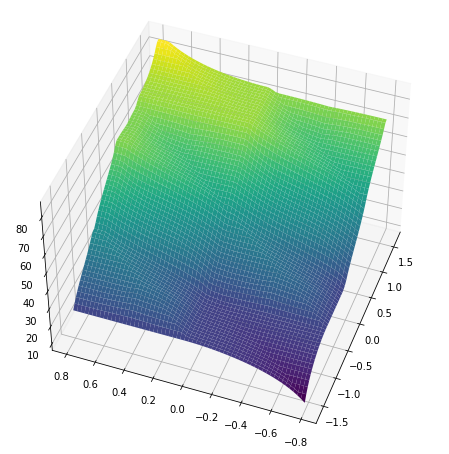

In [ ]:
#Con lắc , alpha, d(alpha)/dt, pwm
import numpy as np
import math
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 

a = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2,0.1), 'a')
da = ctrl.Antecedent(np.arange(-np.pi/4,np.pi/4,0.1), 'da')
pwm = ctrl.Consequent(np.arange(-100,100,1), 'pwm')
# tao ham cho tung member
a['LN'] = fuzz.trimf(a.universe, [-np.pi/2,-np.pi/2,-np.pi/4])
a['N'] = fuzz.trimf(a.universe, [-np.pi/2,-np.pi/4,0])
a['ZE'] = fuzz.trimf(a.universe, [-np.pi/4,0,np.pi/4])
a['P'] = fuzz.trimf(a.universe, [0,np.pi/4,np.pi/2])
a['LP'] = fuzz.trimf(a.universe, [np.pi/4, np.pi/2, np.pi/2])

da['LN'] = fuzz.trimf(da.universe, [-np.pi/2,-np.pi/2,-np.pi/4])
da['N'] = fuzz.trimf(da.universe, [-np.pi/2,-np.pi/4,0])
da['ZE'] = fuzz.trimf(da.universe, [-np.pi/4,0,np.pi/4])
da['P'] = fuzz.trimf(da.universe, [0,np.pi/4,np.pi/2])
da['LP'] = fuzz.trimf(da.universe, [np.pi/4, np.pi/2, np.pi/2])

pwm['LN'] = fuzz.trimf(pwm.universe, [0,0,25])
pwm['N'] = fuzz.trimf(pwm.universe, [0,25,50])
pwm['ZE'] = fuzz.trimf(pwm.universe, [25,50,75])
pwm['P'] = fuzz.trimf(pwm.universe, [50,75,100])
pwm['LP'] = fuzz.trimf(pwm.universe, [75, 100, 100])


rule0 = ctrl.Rule(antecedent = ((a['LN']&da['LN'])|(a['LN']&da['N'])
|(a['N']&da['LN'])), consequent = pwm['LN'], label = 'pwmLN')
rule1 = ctrl.Rule(antecedent = ((a['LN']&da['ZE'])|(a['LN']&da['P'])
|(a['N']&da['N'])|(a['N']&da['ZE'])|(a['ZE']&da['LN'])|(a['ZE']&da['N'])
|(a['P']&da['LN'])), consequent = pwm['N'], label = 'pwmN')
rule2 = ctrl.Rule(antecedent = ((a['LP']&da['LN'])|(a['P']&da['N'])
|(a['ZE']&da['ZE'])|(a['N']&da['P'])|(a['LN']&da['LP'])), 
consequent = pwm['ZE'], label = 'pwmZE')
rule3 = ctrl.Rule(antecedent = ((a['N']&da['LP'])|(a['ZE']&da['P'])
|(a['ZE']&da['LP'])|(a['P']&da['ZE'])|(a['P']&da['P'])|(a['LP']&da['N'])
|(a['LP']&da['ZE'])), consequent = pwm['P'], label = 'pwmP')
rule4 = ctrl.Rule(antecedent = ((a['P']&da['LP'])|(a['LP']&da['P'])
|(a['LP']&da['LP'])), consequent = pwm['LP'], label = 'pwmLP')
system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-np.pi/2,np.pi/2,61)
upsampled1 = np.linspace(-np.pi/4,np.pi/4,61)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['a'] = x[i,j]
    sim.input['da'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['pwm']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)

ax.view_init(45,200)